<a href="https://colab.research.google.com/github/yagniksram007/Neural_Networks_Lab/blob/main/NN_Lab_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program 1

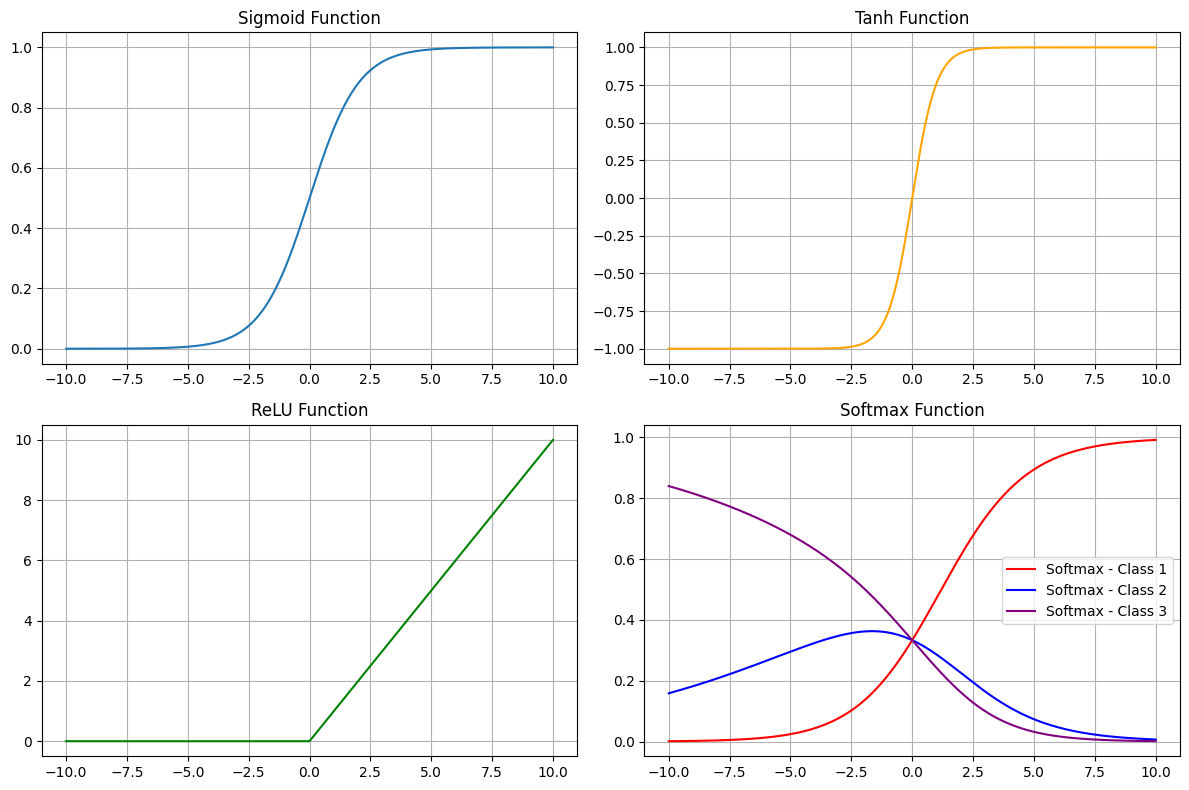

In [8]:
# Write a program to demonstrate the working of different activation functions like Sigmoid, Tanh, RELU and softmax to train neural network.

import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max to prevent overflow
    return exp_x / exp_x.sum(axis=0)

# Create input values
x = np.linspace(-10, 10, 400)

# Apply activation functions
sigmoid_values = sigmoid(x)
tanh_values = tanh(x)
relu_values = relu(x)

# For softmax, we use a set of values (instead of point-wise) to illustrate distribution
softmax_input = np.array([x, x/2, x/3])
softmax_values = softmax(softmax_input)

# Plotting activation functions
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid_values, label="Sigmoid")
plt.title("Sigmoid Function")
plt.grid(True)

# Tanh
plt.subplot(2, 2, 2)
plt.plot(x, tanh_values, label="Tanh", color='orange')
plt.title("Tanh Function")
plt.grid(True)

# ReLU
plt.subplot(2, 2, 3)
plt.plot(x, relu_values, label="ReLU", color='green')
plt.title("ReLU Function")
plt.grid(True)

# Softmax
plt.subplot(2, 2, 4)
plt.plot(x, softmax_values[0], label="Softmax - Class 1", color='red')
plt.plot(x, softmax_values[1], label="Softmax - Class 2", color='blue')
plt.plot(x, softmax_values[2], label="Softmax - Class 3", color='purple')
plt.title("Softmax Function")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Program 2

In [9]:
# 2a. Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models. Use the Perceptron () from sklearn.
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Create a synthetic dataset with valid parameters
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, flip_y=0, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Step 3: Initialize the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=1, random_state=42)

# Step 4: Train the Perceptron model
perceptron.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = perceptron.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optional: Print the model coefficients and intercept
print(f'Coefficients: {perceptron.coef_}')
print(f'Intercept: {perceptron.intercept_}')

# Output:
# Accuracy: 0.93
# Coefficients: [[ 7.64250985 -2.13502276]]
# Intercept: [4.]


Accuracy: 0.93
Coefficients: [[ 7.64250985 -2.13502276]]
Intercept: [4.]


Program 3

Epoch 0, Loss: 0.25000048447272183
Epoch 100, Loss: 0.2500003330292218
Epoch 200, Loss: 0.2500002289264607
Epoch 300, Loss: 0.2500001573659216
Epoch 400, Loss: 0.25000010817501983
Epoch 500, Loss: 0.2500000743610745
Epoch 600, Loss: 0.25000005111729073
Epoch 700, Loss: 0.25000003513946234
Epoch 800, Loss: 0.2500000241562687
Epoch 900, Loss: 0.2500000166063982
Accuracy: 0.50


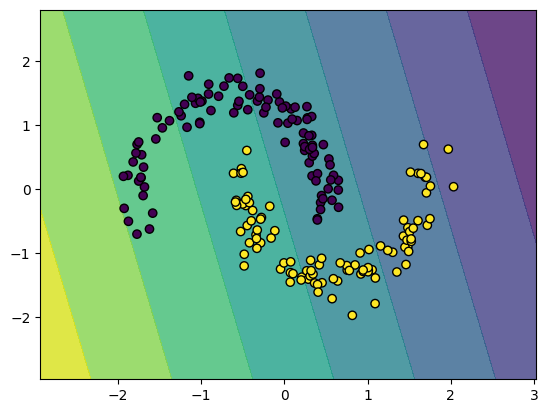

In [7]:
# Build a deep feed forward ANN by implementing the backpropagation algorithm an test the same using appropriate dataset. Use the hidden layers >=4

import numpy as np

class DeepFeedForwardNN:
    def __init__(self, input_size, hidden_layers, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        layer_sizes = [input_size] + hidden_layers + [output_size]

        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.a = [X]
        self.z = []
        for i in range(len(self.weights)):
            self.z.append(np.dot(self.a[i], self.weights[i]) + self.biases[i])
            self.a.append(self.sigmoid(self.z[i]))
        return self.a[-1]

    def backward(self, X, y):
        m = X.shape[0]
        self.d_weights = []
        self.d_biases = []

        # Compute the error in the output layer
        d_loss = self.a[-1] - y
        d_a = d_loss * self.sigmoid_derivative(self.a[-1])

        # Backpropagate the error
        for i in reversed(range(len(self.weights))):
            d_weights = np.dot(self.a[i].T, d_a) / m
            d_biases = np.sum(d_a, axis=0, keepdims=True) / m
            self.d_weights.insert(0, d_weights)
            self.d_biases.insert(0, d_biases)
            if i > 0:
                d_a = np.dot(d_a, self.weights[i].T) * self.sigmoid_derivative(self.a[i])

    def update_parameters(self):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * self.d_weights[i]
            self.biases[i] -= self.learning_rate * self.d_biases[i]

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            self.update_parameters()
            if epoch % 100 == 0:
                loss = np.mean((self.a[-1] - y) ** 2)
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        return self.forward(X)
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshape for binary classification

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the network
nn = DeepFeedForwardNN(input_size=2, hidden_layers=[8, 8, 8, 8], output_size=1, learning_rate=0.01)
nn.train(X_train, y_train, epochs=1000)

# Test the network
predictions = nn.predict(X_test)
accuracy = np.mean((predictions > 0.5) == y_test)
print(f'Accuracy: {accuracy:.2f}')
import matplotlib.pyplot as plt

def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(nn.predict, X_test, y_test)

Program 4

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 115ms/step - accuracy: 0.7262 - loss: 0.7895 - val_accuracy: 0.8502 - val_loss: 0.4213
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.8686 - loss: 0.3675 - val_accuracy: 0.8765 - val_loss: 0.3451
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8863 - loss: 0.3111 - val_accuracy: 0.8832 - val_loss: 0.3190
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9013 - loss: 0.2667 - val_accuracy: 0.8927 - val_loss: 0.2975
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 104ms/step - accuracy: 0.9087 - loss: 0.2458 - val_accuracy: 0.8992 - val_loss: 0.2874
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9168 - loss: 0.2277 - val_accuracy: 0.9016 - val_loss: 0.2675
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 116ms/step - accuracy: 0.9230 - loss: 0.2127 - val_accuracy: 0.9046 - val_loss: 0.2604
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 107ms/step - accuracy: 0.9282 - loss: 0

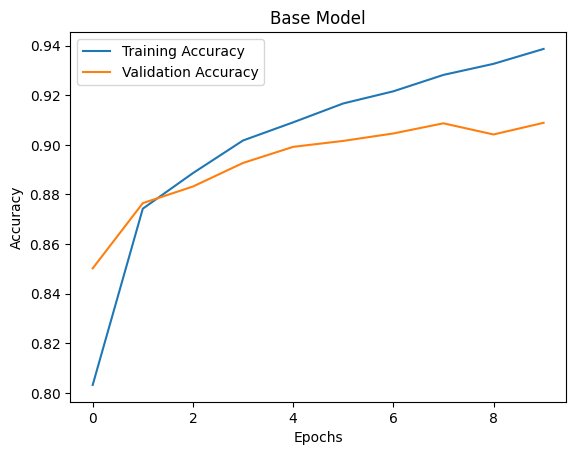

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 115ms/step - accuracy: 0.6343 - loss: 2.9181 - val_accuracy: 0.7820 - val_loss: 0.9414
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.7922 - loss: 0.8789 - val_accuracy: 0.7950 - val_loss: 0.7758
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.8126 - loss: 0.7411 - val_accuracy: 0.8178 - val_loss: 0.7181
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.8239 - loss: 0.6951 - val_accuracy: 0.8294 - val_loss: 0.6802
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 116ms/step - accuracy: 0.8280 - loss: 0.6727 - val_accuracy: 0.8258 - val_loss: 0.6696
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 110ms/step - accuracy: 0.8337 - loss: 0.6474 - val_accuracy: 0.8368 - val_loss: 0.6334
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.8431 - loss: 0.6230 - val_accuracy: 0.8321 - val_loss: 0.6339
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 110ms/step - accuracy: 0.8409 - loss: 0

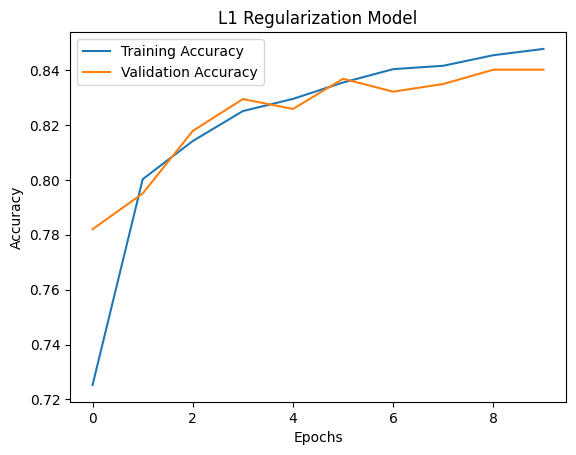

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 113ms/step - accuracy: 0.7140 - loss: 1.0061 - val_accuracy: 0.8431 - val_loss: 0.5719
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8555 - loss: 0.5262 - val_accuracy: 0.8653 - val_loss: 0.4859
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 112ms/step - accuracy: 0.8719 - loss: 0.4616 - val_accuracy: 0.8666 - val_loss: 0.4680
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.8783 - loss: 0.4274 - val_accuracy: 0.8797 - val_loss: 0.4246
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.8887 - loss: 0.4002 - val_accuracy: 0.8842 - val_loss: 0.4141
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.8925 - loss: 0.3885 - val_accuracy: 0.8877 - val_loss: 0.3992
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.8914 - loss: 0.3845 - val_accuracy: 0.8783 - val_loss: 0.4195
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 117ms/step - accuracy: 0.8973 - loss: 0

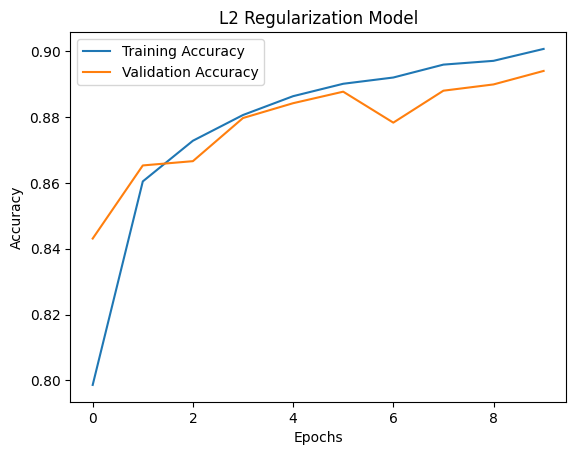

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.6565 - loss: 0.9437 - val_accuracy: 0.8354 - val_loss: 0.4492
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.8341 - loss: 0.4648 - val_accuracy: 0.8649 - val_loss: 0.3691
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 112ms/step - accuracy: 0.8592 - loss: 0.3954 - val_accuracy: 0.8756 - val_loss: 0.3380
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.8742 - loss: 0.3519 - val_accuracy: 0.8831 - val_loss: 0.3168
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.8828 - loss: 0.3218 - val_accuracy: 0.8893 - val_loss: 0.3083
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 116ms/step - accuracy: 0.8911 - loss: 0.3046 - val_accuracy: 0.8928 - val_loss: 0.2970
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 112ms/step - accuracy: 0.8943 - loss: 0.2944 - val_accuracy: 0.8983 - val_loss: 0.2815
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.9007 - loss: 0

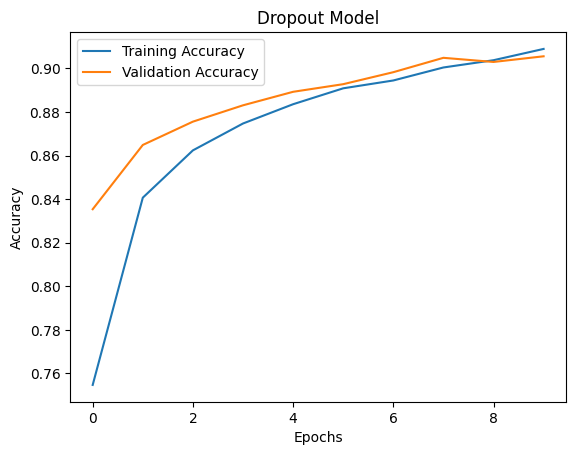

In [ ]:
# Use the concept of regularization and dropout while designing the CNN model. Use the Fashion MNIST datasets. Record the Training accuracy and Test accuracy corresponding to the following architectures:
# a. Base Model
# b. Model with L1 Regularization
# c. Model with L2 Regularization
# d. Model with Dropout

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Step 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Function to plot accuracy
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Step 2: Build and compile the models

# Base Model
def build_base_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Model with L1 Regularization
def build_l1_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l1(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                      kernel_regularizer=regularizers.l1(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Model with L2 Regularization
def build_l2_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Model with Dropout
def build_dropout_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 3: Train and Evaluate each Model
def train_and_evaluate(model, title):
    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10, batch_size=128)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"{title} Test Accuracy: {test_acc * 100:.2f}%")
    plot_accuracy(history, title)

# Base Model
base_model = build_base_model()
train_and_evaluate(base_model, "Base Model")

# Model with L1 Regularization
l1_model = build_l1_model()
train_and_evaluate(l1_model, "L1 Regularization Model")

# Model with L2 Regularization
l2_model = build_l2_model()
train_and_evaluate(l2_model, "L2 Regularization Model")

# Model with Dropout
dropout_model = build_dropout_model()
train_and_evaluate(dropout_model, "Dropout Model")



Program 5

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8738 - loss: 0.4208 - val_accuracy: 0.9692 - val_loss: 0.1026
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9742 - loss: 0.0838 - val_accuracy: 0.9748 - val_loss: 0.0777
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9844 - loss: 0.0499 - val_accuracy: 0.9718 - val_loss: 0.0886
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9778 - val_loss: 0.0763
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9891 - loss: 0.0331 - val_accuracy: 0.9817 - val_loss: 0.0636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


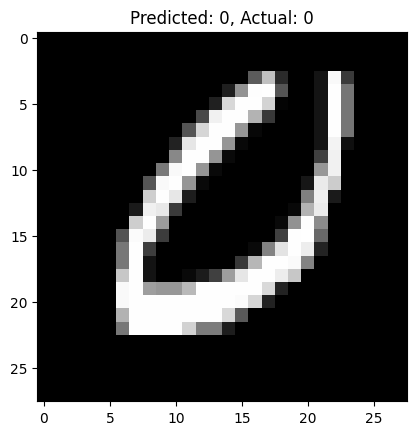

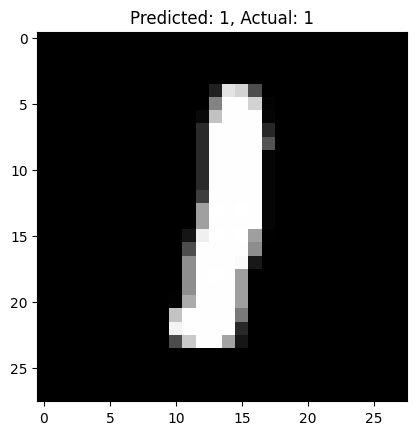

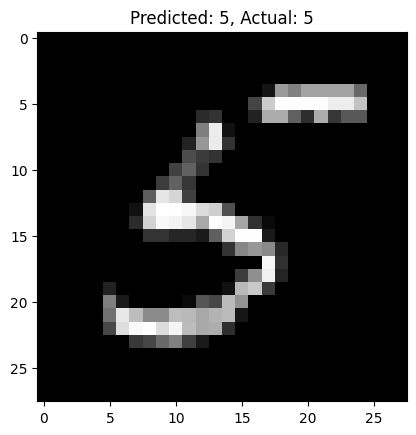

In [2]:
# Design and implement an image classification model to classify a dataset of images using deep feed forward neural network. Record the accuracy corresponding to the number of epochs. Use MNIST datatset.

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Dataset
# Load the MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Design the Model (Deep Feedforward Neural Network)
model = models.Sequential()

# Input layer (784 units corresponding to 28x28 pixels)
model.add(layers.InputLayer(input_shape=(28*28,)))

# Hidden layers (Dense/fully connected layers with ReLU activation)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output layer (10 units for 10 classes, with softmax for multi-class classification)
model.add(layers.Dense(10, activation='softmax'))

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=5, batch_size=128)

# Step 5: Select your own 3 images from the MNIST test set
# Let's pick 3 random test images
indices = np.random.choice(x_test.shape[0], 3)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Step 6: Predict the class of the selected images
predictions = model.predict(sample_images)

# Convert predictions from one-hot encoded format to digits
predicted_digits = np.argmax(predictions, axis=1)
actual_digits = np.argmax(sample_labels, axis=1)

# Step 7: Display the selected images and their predicted labels
for i in range(3):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digits[i]}, Actual: {actual_digits[i]}")
    plt.show()



Task a: Predicting the Next Word in a Sentence

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

# Example text data
text_data = "I love machine learning. Machine learning is fascinating. I enjoy coding."
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in text_data.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

model_word = Sequential()
model_word.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model_word.add(SimpleRNN(100))
model_word.add(Dense(total_words, activation='softmax'))

model_word.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_word.fit(X, y, epochs=100, verbose=1)

def predict_next_word(model, tokenizer, text, max_sequence_length):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    return tokenizer.index_word[np.argmax(predicted)]

print(predict_next_word(model_word, tokenizer, "I love", max_sequence_length))



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.2175
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1250 - loss: 2.1623
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6250 - loss: 2.1080
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8750 - loss: 2.0541
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8750 - loss: 2.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8750 - loss: 1.9453
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8750 - loss: 1.8894
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8750 - loss: 1.8322
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8750 - loss: 1.7732
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8750 - loss: 1.7122
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8750 - loss: 1.6493
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8750 - loss: 1.5844

Task b: Predicting the Next Value in a Sequence of Numbers

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 3
X, y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

model_value = Sequential()
model_value.add(SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)))
model_value.add(Dense(1))

model_value.compile(loss='mean_squared_error', optimizer='adam')
model_value.fit(X, y, epochs=100, verbose=1)

def predict_next_value(model, data, time_step):
    data = scaler.transform(data.reshape(-1, 1))
    input_data = data[-time_step:].reshape(1, time_step, 1)
    prediction = model.predict(input_data)
    return scaler.inverse_transform(prediction)[0][0]

next_value = predict_next_value(model_value, data[-time_step:], time_step)
print(next_value)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2852
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2238
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1699
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1237
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0852
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0546
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0317
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0163
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0079
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0057
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0083
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0139
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0206
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0266
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0306
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

Program 6